In [54]:
##importing major Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
init_notebook_mode(connected=True)
%matplotlib inline
# For offline use
cf.go_offline()

In [55]:
df = pd.read_csv('taskdata.txt')
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [57]:
df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

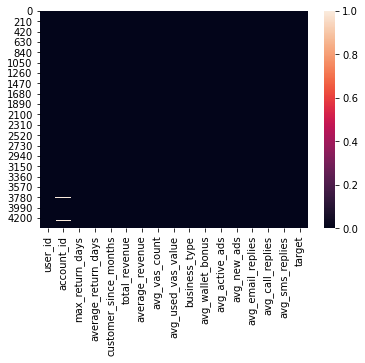

In [58]:
sns.heatmap(df.isnull())
df.isnull().sum()

In [59]:
## Since the number of null value is considerable smaller and denotes a unique value ,
## We could also choose to give them another unique ID but here I have just removed them as 
## 7 out of 4400 is not a big number
df.dropna(axis =0,inplace= True)
#sns.heatmap(df.isnull()) ## uncomment to view the heatmap that shows the data has no none values now
df.duplicated().sum()

0

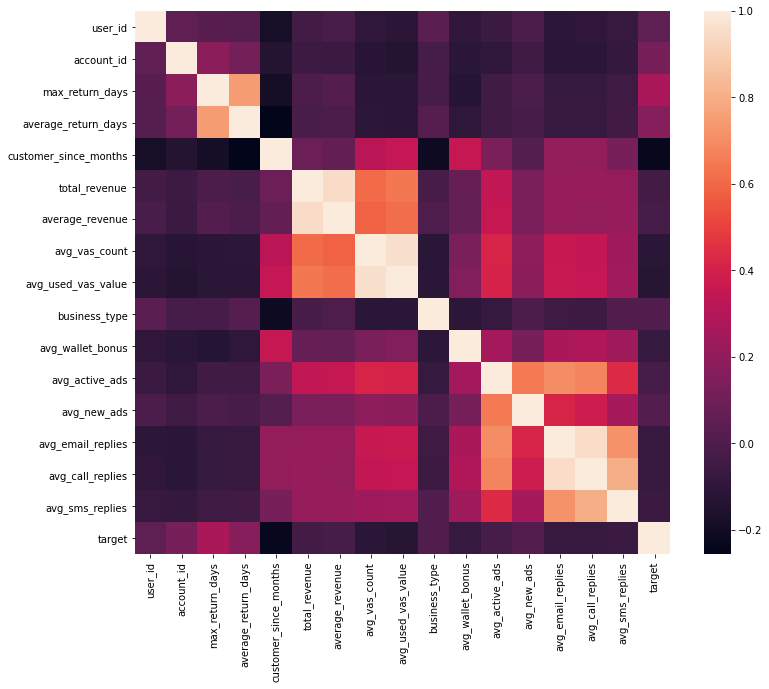

In [60]:
## Since there are no None values and no duplicates we can start describing the dataset
plt.figure(figsize=(12,10))
cor_columns = df.corr()
sns.heatmap(cor_columns,)

#### User id, account id  has no contribution in the target variable

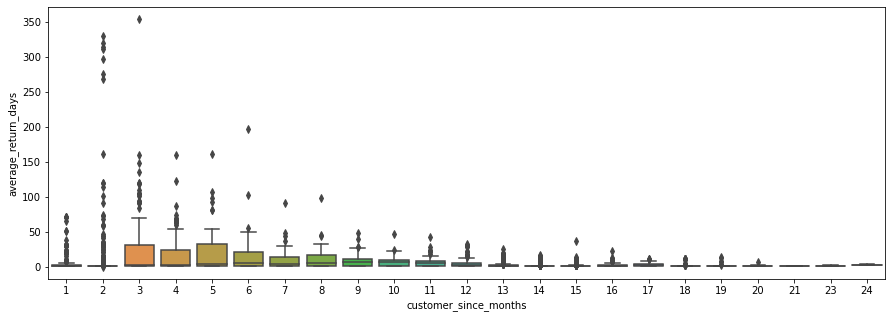

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df['average_return_days'],x=df['customer_since_months'])
## We see there is a trend in the return days and the number of months a customer has been with coming

#### From the above graph it can be infered that :
#### 1) More loyal customers are returns more often 
####  2) Newer customers are more likely not to return for a long time

#### Function to group customers since quarters 
#### Quarter 1 means for the first 4 months of the data
#### Quarter 2 means for the 4th to 8th months of the data
#### and so on.

In [62]:
def quater_func (value):
    if value%4 == 0:
        return  int(value/4)
    else:
        return int(value/4)+1

In [63]:
df['Quater'] = df['customer_since_months'].apply(quater_func)
grop_df = df.groupby(df['Quater']).mean()

In [64]:

grop_df.drop(['target','user_id','account_id','business_type','total_revenue'],axis='columns',inplace=True)
grop_df.head()

,max_return_days,average_return_days,customer_since_months,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,Quater
Quater,,,,,,,,,,,,,
1,24.353982,14.045067,2.436578,5.269645,0.966781,19.242216,7.606686,36.908128,13.823419,11.089626,11.643215,0.090659,1.0
2,46.700709,12.373673,6.424113,9.050182,1.602084,34.651418,92.267348,69.888434,19.453489,14.922309,15.652785,0.083652,2.0
3,34.503279,6.604372,10.609836,27.204119,3.282805,70.621009,200.335230,131.246028,17.483892,25.138977,26.995186,0.162817,3.0
4,9.568108,2.172259,14.081081,21.161152,4.848072,109.072002,565.709108,126.977359,16.645055,36.617245,39.535122,0.223967,4.0
5,9.047847,2.390686,18.000000,31.172177,5.558259,130.851051,1016.297895,151.408420,20.547143,36.883480,41.146689,0.220672,5.0


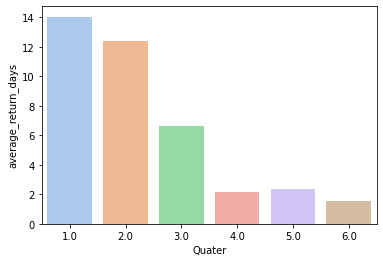

In [65]:
sns.barplot(x=grop_df['Quater'],y=grop_df['average_return_days'],palette="pastel")

In [66]:
 df.groupby(df['Quater']).mean().reset_index()

,Quater,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,1,5.701822e+09,508.969518,24.353982,14.045067,2.436578,10.885056,5.269645,0.966781,19.242216,0.918387,7.606686,36.908128,13.823419,11.089626,11.643215,0.090659,0.182891
1,2,5.451548e+09,657.758865,46.700709,12.373673,6.424113,47.291654,9.050182,1.602084,34.651418,0.649645,92.267348,69.888434,19.453489,14.922309,15.652785,0.083652,0.229787
2,3,4.159481e+09,552.095082,34.503279,6.604372,10.609836,297.001110,27.204119,3.282805,70.621009,0.318033,200.335230,131.246028,17.483892,25.138977,26.995186,0.162817,0.072131
3,4,2.875391e+09,447.035676,9.568108,2.172259,14.081081,286.772666,21.161152,4.848072,109.072002,0.297838,565.709108,126.977359,16.645055,36.617245,39.535122,0.223967,0.031351
4,5,2.709246e+09,380.315789,9.047847,2.390686,18.000000,430.151007,31.172177,5.558259,130.851051,0.200957,1016.297895,151.408420,20.547143,36.883480,41.146689,0.220672,0.009569
5,6,2.398392e+08,468.333333,7.111111,1.533011,22.333333,1057.792056,74.318857,7.905271,171.887464,0.666667,4328.831111,238.782051,28.554843,60.553419,66.861823,0.335470,0.222222


In [67]:
 df.groupby(df['Quater']).count().reset_index()[['Quater','user_id']]

,Quater,user_id
0,1,1017
1,2,705
2,3,610
3,4,1850
4,5,209
5,6,9


In [68]:
# As quarter increates max_return_days in decreases , average_revenue increases

#### From the above plot it is evident that customers who have been with the company has been 
#### returning more often in comparision to the customers that are reletively 


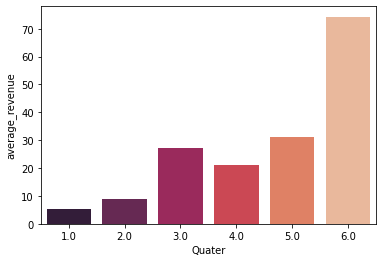

In [69]:
sns.barplot(y=grop_df['average_revenue'],x=grop_df['Quater'],palette="rocket")

#### We can see there is a drop in revenue from quater 3 to quarter 4
#### We can see a similar trend in new adds and average active adds

In [70]:
target_df = df
target_df= target_df.drop(['account_id','business_type'],axis='columns')

target_df.head()

,user_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,Quater
0,410039,8,1.500000,14,0.0,0.0,3.666667,66.666667,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0,4
1,410240,37,8.200000,10,0.0,0.0,4.900000,114.000000,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0,3
2,411764,9,1.533333,15,0.0,0.0,5.333333,106.666667,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0,4
3,411985,1,1.000000,14,0.0,0.0,6.307692,176.153846,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1,4
4,412071,1,1.000000,18,0.0,0.0,5.846154,109.230769,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0,5


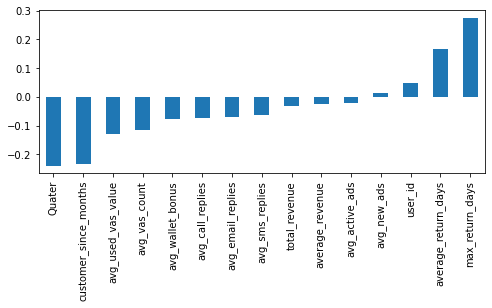

In [71]:
plt.figure(figsize=(8,3))
target_df.corr()['target'].drop('target').sort_values().plot(kind='bar')

#### We can see that return days has a positive correlation with the Target variable 
#### Concluding that the more older the customer is , he/she returns more often and are more likely to stay.

#### From above we infer that we are not making any revenue from customers of buisness type 2 irrespective of if they are staying or not
#### We are making maximum average revenue from the customers of business 5,3 from which we are not retaning customers of business 3 so this might be source of our loss

In [72]:
df['business_type'].unique()

array([0, 3, 5, 1, 4, 2])

In [73]:
df1 = df.groupby(df['business_type']).mean()[['total_revenue','average_revenue']].reset_index()

In [74]:
df1.head()

,business_type,total_revenue,average_revenue
0,0,220.136856,18.149241
1,1,61.012455,7.343402
2,2,0.000000,0.000000
3,3,133.656032,19.479363
4,4,38.988737,9.523449


In [75]:
#### considering only customers with positive revenue.####

In [76]:
df2 = df[df['total_revenue']>0].groupby(df['business_type']).mean()[['total_revenue','average_revenue']].reset_index()

In [77]:
df2.sort_values(by= 'average_revenue',ascending=False)

,business_type,total_revenue,average_revenue
2,3,1477.641689,215.355177
3,4,675.804767,165.073113
0,0,1664.426052,137.224042
4,5,1151.340559,131.568927
1,1,449.720835,54.127982


In [78]:
### max Average Revenue from Business type 3 ####

In [79]:
df['business_type'].value_counts()

0    3478
1     457
3     199
5     165
4      52
2      49
Name: business_type, dtype: int64

In [80]:
df['business_type'].count()

4400

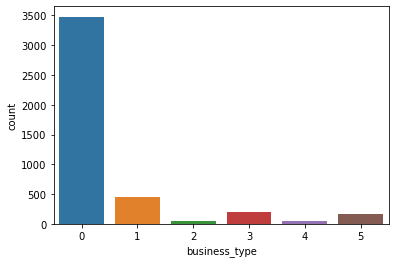

In [81]:
sns.countplot(x= 'business_type', data = df)

In [82]:
3478/4400

0.7904545454545454

In [83]:
###   79% customers are from business type 0  ###

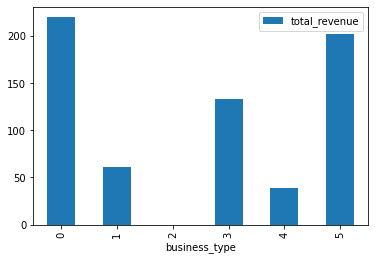

In [84]:
df1.plot(kind='bar',x='business_type',y='total_revenue') 
### all customers are considered ####

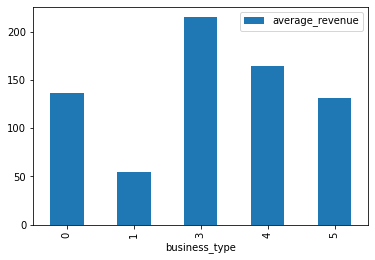

In [85]:
df2.plot(kind='bar',x='business_type',y='average_revenue',) 
#### Considering customers which provides positive revenue ####

In [86]:
### maximum total revenue is from business type 0, 

### Considering revenue generating customers maximum average revenue is from business type 3 
### Customer from 3,4 business types should be targeted, schemes and bonuses should be given for customer retainment.

In [87]:
df.groupby(df['target']).median()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,Quater
target,,,,,,,,,,,,,,,,,
0,6.841803e+08,493.0,2.0,1.071429,13.0,0.0,0.0,2.250000,50.357143,0.0,70.0,41.519231,6.392308,13.500000,14.118056,0.0,4.0
1,7.224663e+09,499.0,13.0,5.358974,5.0,0.0,0.0,0.645833,13.095238,0.0,0.0,26.100000,6.198718,5.759615,5.535714,0.0,2.0


In [88]:
df.groupby(df['target']).mean()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,Quater
target,,,,,,,,,,,,,,,,,
0,3.995003e+09,493.068677,18.286873,6.091717,10.296503,211.561710,18.073397,3.472902,77.318343,0.494171,360.973839,101.198003,16.432441,27.038121,29.214592,0.173216,3.005575
1,5.072594e+09,623.762115,57.786344,16.586245,6.303965,45.616763,7.375511,1.349967,27.879469,0.517621,150.911432,79.826392,19.692925,14.176786,14.105809,0.067096,1.973568


In [89]:
df6 = df.groupby(df['customer_since_months']).mean().reset_index()

In [90]:
df6.head()

,customer_since_months,user_id,account_id,max_return_days,average_return_days,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,Quater
0,1,6.110782e+09,363.720000,7.225000,7.225000,2.554913,2.554913,0.895000,16.850000,1.150000,0.000000,27.415000,14.760000,7.505000,8.065000,0.050000,0.000000,1.0
1,2,5.828942e+09,515.471698,12.738544,12.734501,10.897369,8.314955,0.570081,12.115903,0.805930,2.830189,37.039084,15.132075,9.039084,9.173854,0.080863,0.118598,1.0
2,3,5.346587e+09,560.903226,39.532258,20.388441,23.528156,6.386080,1.348118,26.294355,0.927419,8.570565,37.191196,12.547648,11.094691,10.888710,0.069220,0.379032,1.0
3,4,5.495483e+09,578.454545,44.409091,15.444444,3.440469,0.907327,1.304966,26.178451,0.883838,23.032828,45.897222,12.023232,18.546296,20.829545,0.176936,0.242424,1.0
4,5,5.306577e+09,671.489130,56.755435,17.454348,67.329177,14.363144,1.408113,30.446105,0.766304,48.847826,49.255474,13.340981,12.842126,11.911400,0.045160,0.353261,2.0


In [91]:
df.groupby(df['customer_since_months']).count()['user_id']

customer_since_months
1     200
2     371
3     248
4     198
5     184
6     195
7     169
8     157
9     132
10    145
11    162
12    171
13    598
14    635
15    486
16    131
17     45
18    127
19     29
20      8
21      4
23      3
24      2
Name: user_id, dtype: int64

In [92]:
df5 = df[df['customer_since_months']<19]

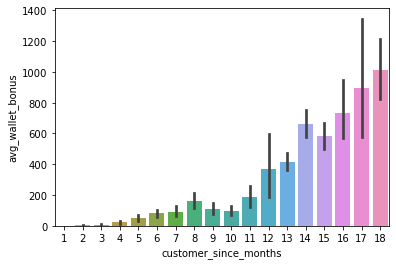

In [93]:
sns.barplot(x='customer_since_months', y ='avg_wallet_bonus', data = df5 )

In [94]:
df5.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,Quater
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0,4
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0,3
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0,4
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1,4
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0,5


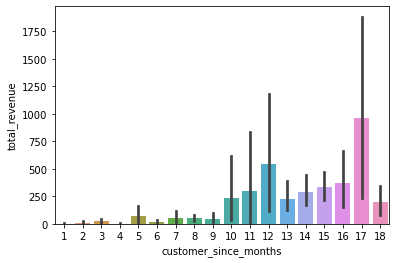

In [95]:
sns.barplot(x='customer_since_months', y ='total_revenue', data = df5 )

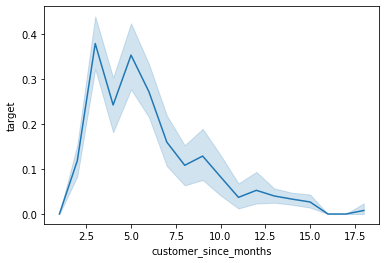

In [96]:
sns.lineplot(x='customer_since_months', y = 'target', data = df5)

In [97]:
### maximum percentage of customers leave after 6-8 months

In [98]:
df.head(10)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,Quater
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.00,79.333333,15.250000,32.416667,27.916667,0.250000,0,4
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.00,232.100000,18.300000,16.200000,13.800000,0.000000,0,3
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.00,55.083333,3.750000,20.250000,24.500000,0.000000,0,4
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.00,409.538462,80.769231,87.461538,57.615385,0.000000,1,4
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.50,48.230769,1.692308,17.461538,25.769231,0.230769,0,5
5,412391,113.0,1,1.000000,14,0.0,0.0,12.692308,380.769231,0,350.00,799.153846,115.153846,166.307692,160.769231,0.153846,0,4
6,412662,1005.0,21,4.636364,11,0.0,0.0,1.000000,26.363636,0,0.00,119.727273,12.454545,46.000000,57.272727,0.181818,0,3
7,457000,262.0,29,3.250000,16,0.0,0.0,3.250000,68.750000,3,63.07,26.937500,3.250000,18.625000,17.062500,0.062500,0,4
8,490356,1005.0,3,1.400000,5,0.0,0.0,0.000000,0.000000,5,0.00,2.500000,0.500000,1.000000,1.750000,0.000000,1,2
9,491551,1017.0,1,1.000000,2,0.0,0.0,0.000000,0.000000,0,0.00,74.500000,10.500000,4.500000,9.500000,0.000000,1,1


In [99]:
df.drop('user_id', inplace = True, axis= 1)
df.drop('account_id', inplace = True, axis= 1)
df.drop('average_revenue', inplace = True, axis= 1)
df.drop('Quater', inplace = True, axis= 1)

In [100]:
######

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.30, 
                                                    random_state=101)

# Logistic Regression 

In [102]:
logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=10000)

In [104]:
predictions = logreg.predict(X_test)

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1194
           1       0.56      0.12      0.20       126

    accuracy                           0.91      1320
   macro avg       0.73      0.55      0.57      1320
weighted avg       0.88      0.91      0.88      1320



In [106]:
print(confusion_matrix(y_test,predictions))

[[1182   12]
 [ 111   15]]


In [107]:
#R-Squared Score

print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test)))

R-Squared for Train set: 0.901
R-Squared for test set: 0.907


In [108]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [109]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

#R-Squared Score

print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scaled, y_test)))

R-Squared for Train set: 0.896
R-Squared for test set: 0.902


In [110]:
print(confusion_matrix(y_test,predictions))

[[1182   12]
 [ 111   15]]


# KNN 

In [114]:
knnclf = KNeighborsClassifier(n_neighbors=1)

knnclf.fit(X_train, y_train)
y_pred = knnclf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8598484848484849


In [115]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

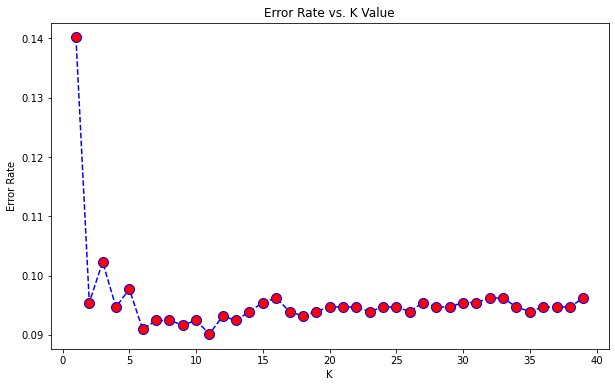

In [116]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [117]:
#### N = 9  ####

In [120]:
knnclf = KNeighborsClassifier(n_neighbors=9)


knnclf.fit(X_train_scaled, y_train)
y_pred = knnclf.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9030303030303031


#### Both KNN and Logistic Regression seems to be doing a good join in predicting the target 

#### I have completer everything and is looking forward to here from your side.
#### If you could spare two minutes i would request you to give me some suggestion on how i can perform            better , please email me with your guidance on 'shreyassharma9912@gmail.com'
#### hope to hear a positive response from your side